<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Introduction_to_Using_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://towardsdatascience.com/4-real-life-problems-solved-using-transformers-and-hugging-face-a-complete-guide-e45fe698cc4d/


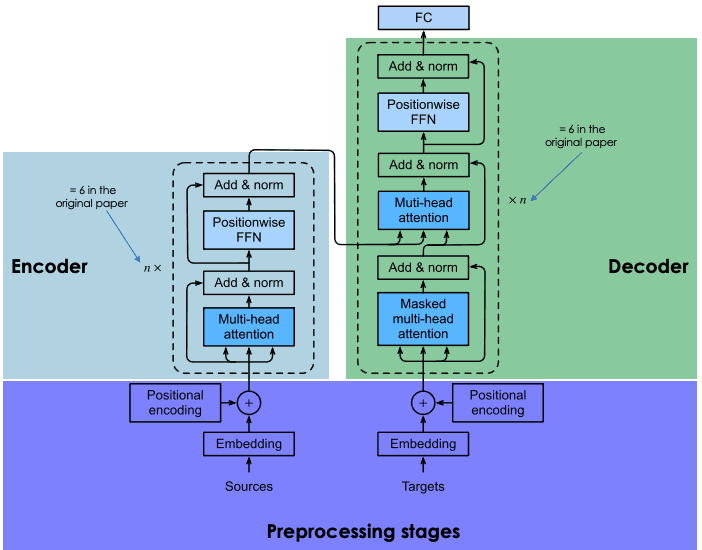

In [1]:
!pip install transformers sentencepiece
from transformers import MarianTokenizer, MarianMTModel, pipeline
import pandas as pd
from textwrap import TextWrapper
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

In [2]:
# Raw URL for the CSV file on GitHub
github_csv_url = "https://raw.githubusercontent.com/HarounTheGreat/Data-Analytics/46584e9058742a9579b6278a271a83c391f2ccd7/Data/datacamp%20Internet%20News%20and%20Consumer%20Engagement.csv"

# Load the data directly from the GitHub URL
news_data = pd.read_csv(github_csv_url)

# Show data information
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        1428 non-null   object 
 1   source_name                      1428 non-null   object 
 2   author                           1317 non-null   object 
 3   title                            1428 non-null   object 
 4   description                      1424 non-null   object 
 5   url                              1427 non-null   object 
 6   url_to_image                     1327 non-null   object 
 7   published_at                     1427 non-null   object 
 8   content                          1262 non-null   object 
 9   top_article                      1426 non-null   float64
 10  engagement_reaction_count        1414 non-null   float64
 11  engagement_comment_count         1414 non-null   float64
 12  engagement_share_cou

In [3]:
# Wrap text to 80 characters.
wrapper = TextWrapper(width=80)

# Choose candidate descriptions
description_76 = news_data.iloc[76]["description"]
description_118 = news_data.iloc[118]["description"]
description_178 = news_data.iloc[178]["description"]

english_texts = [description_76, description_118, description_178]

for english_text in english_texts:
    print(wrapper.fill(english_text))
    print("n")

"I never pay for things with a debit card because I prefer to use my credit
card, where I'm always getting the equivalent of 2% back or more on my
purchases. Credit cards also offer better protections, less liability in case of
fraud, and more leverage with me…"
n
"South African police arrested more than 80 people and confirmed five deaths as
riots in Johannesburg and the capital Pretoria intensified on Tuesday, spreading
to surrounding townships with roving groups attacking mainly foreign-owned
shops."
n
"Apple is hosting an event on September 10 where it's likely to introduce new
iPhones. One of those devices will likely be a successor to last year's iPhone
XR — right now, it's being called the iPhone 11R. I've been using an iPhone 6S
for about three years, a…"
n


# Language Translation

In [4]:
# Get the name of the model
trans_model_name = 'Helsinki-NLP/opus-mt-en-fr'

# Get the tokenizer
trans_model_tkn = MarianTokenizer.from_pretrained(trans_model_name)

# Instanciate the model
trans_model = MarianMTModel.from_pretrained(trans_model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [5]:
def format_batch_texts(language_code, batch_texts):
    formated_bach = [">>{}<< {}".format(language_code, text) for text in batch_texts]
    return formated_bach

In [6]:
def perform_translation(batch_texts, model, tokenizer, language="pl"):

  # Prepare the text data into appropriate format for the model
  formated_batch_texts = format_batch_texts(language, batch_texts)

  # Generate translation using model
  translated = model.generate(**tokenizer(formated_batch_texts, return_tensors="pt", padding=True))

  # Convert the generated tokens indices back into text
  translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

  return translated_texts

In [7]:
def perform_translation(batch_texts, model, tokenizer, language="fr"):
    # Prepare the text data into appropriate format for the model
    formated_batch_texts = format_batch_texts(language, batch_texts)

    # Generate translation using model
    translated = model.generate(**tokenizer(formated_batch_texts, return_tensors="pt", padding=True))

    # Convert the generated tokens indices back into text
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

    return translated_texts

# Check the model translation from the original language (English) to French
translated_texts = perform_translation(english_texts, trans_model, trans_model_tkn)

for text in translated_texts:
  print(wrapper.fill(text))
  print("\n")

"Je ne paie jamais pour des choses avec une carte de débit parce que je préfère
utiliser ma carte de crédit, où je récupère toujours l'équivalent de 2% ou plus
sur mes achats. Les cartes de crédit offrent également de meilleures
protections, moins de responsabilité en cas de fraude, et plus de levier avec
moi..."


"La police sud-africaine a arrêté plus de 80 personnes et a confirmé cinq morts
alors que les émeutes à Johannesburg et à Pretoria, capitale, se sont
intensifiées mardi, se répandant dans les townships environnants avec des
groupes itinérants attaquant principalement des magasins appartenant à des
étrangers."


"Apple accueille un événement le 10 septembre où il est probable d'introduire de
nouveaux iPhones. L'un de ces appareils sera probablement un successeur à
l'iPhone XR de l'année dernière — en ce moment, il est appelé l'iPhone 11R.
J'utilise un iPhone 6S depuis environ trois ans, un..."




# Zero-shot classification

In [8]:
candidate_labels = ["tech", "politics", "business", "finance"]

In [9]:
my_classifier = pipeline("zero-shot-classification", model='joeddav/xlm-roberta-large-xnli')

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [10]:
def run_predictions(text, model = my_classifier):

  # Run the prediction
  result = model(text, candidate_labels, multi_class = True)

  # Get result as dataframe
  del result["sequence"]
  result_df = pd.DataFrame(result)

  return {"Text": text, "Result": result_df}

In [11]:
#For the first description
prediction_desc_76 = run_predictions(english_texts[0])

print(wrapper.fill(prediction_desc_76["Text"]))

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


"I never pay for things with a debit card because I prefer to use my credit
card, where I'm always getting the equivalent of 2% back or more on my
purchases. Credit cards also offer better protections, less liability in case of
fraud, and more leverage with me…"


In [12]:
print(prediction_desc_76["Result"])

     labels    scores
0   finance  0.817512
1  business  0.627015
2      tech  0.521052
3  politics  0.434767


In [13]:
#For the last description
prediction_desc_178 = run_predictions(english_texts[-1])

print(wrapper.fill(prediction_desc_178["Text"]))

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


"Apple is hosting an event on September 10 where it's likely to introduce new
iPhones. One of those devices will likely be a successor to last year's iPhone
XR — right now, it's being called the iPhone 11R. I've been using an iPhone 6S
for about three years, a…"


In [14]:
print(prediction_desc_178["Result"])

     labels    scores
0      tech  0.958529
1  business  0.392061
2  politics  0.033093
3   finance  0.025995


# Sentiment classification

I use *ProsusAI/finbert* model due to this model have 3 class (positive, negative, neutral) and was trained on news, so its better to my data.




In [15]:
distil_bert_model = pipeline(task = "sentiment-analysis", model="ProsusAI/finbert")

Device set to use cpu


In [16]:
# Run the predictions
distil_bert_model(english_texts[1:])

[{'label': 'negative', 'score': 0.8945626020431519},
 {'label': 'neutral', 'score': 0.88111412525177}]

first text sentiment:  Negative

Why: Describes riots, violence, arrests, and deaths. Content related to conflict and threat predominates.


---

second text sentiment: Neutral

Why: Informative, factual tone. No overt emotion—neither positive nor negative.

# Question Answering

In [17]:
model_checkpoint = "deepset/roberta-base-squad2"

task = 'question-answering'
QA_model = pipeline(task, model=model_checkpoint, tokenizer=model_checkpoint)

Device set to use cpu


In [18]:
QA_input = {
          'question': 'when is Apple hosting an event?',
          'context': english_texts[-1]
          }

In [19]:
model_response = QA_model(QA_input)
pd.DataFrame([model_response])

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


,score,start,end,answer
0,0.981136,30,42,September 10


In [20]:
QA_input = {
          'question': 'how many people were arrested?',
          'context': english_texts[1]
          }

In [21]:
model_response = QA_model(QA_input)
pd.DataFrame([model_response])

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


,score,start,end,answer
0,0.466154,31,43,more than 80


In [22]:
QA_input = {
          'question': 'what stores are being attacked?',
          'context': english_texts[1]
          }

In [23]:
model_response = QA_model(QA_input)
pd.DataFrame([model_response])

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


,score,start,end,answer
0,0.611585,222,241,foreign-owned shops
